# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Your code here
house_prices = pd.read_csv("C:/Users/diana/Documents/Repos/GitHub/lab-problems-in-ml/data/boston_data.csv")
house_prices


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [3]:
# crim: Per capita crime rate by town.
# zn: Proportion of residential land zoned for lots over 25,000 square feet (about 2,322 square meters).
# indus: Proportion of non-retail business acres per town.
# chas: Charles River dummy variable
# nox: Nitric oxides concentration
# rm: Average number of rooms per dwelling.
# age: Proportion of owner-occupied units built prior to 1940.
# dis: Weighted distances to five Boston employment centers.
# rad: Index of accessibility to radial highways.
# tax: Full-value property-tax rate per $10,000.
# ptratio: Pupil-teacher ratio by town.
# black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# lstat: Percentage of lower status of the population.
# medv: Median value of owner-occupied homes.

In [4]:
house_prices.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
house_prices.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

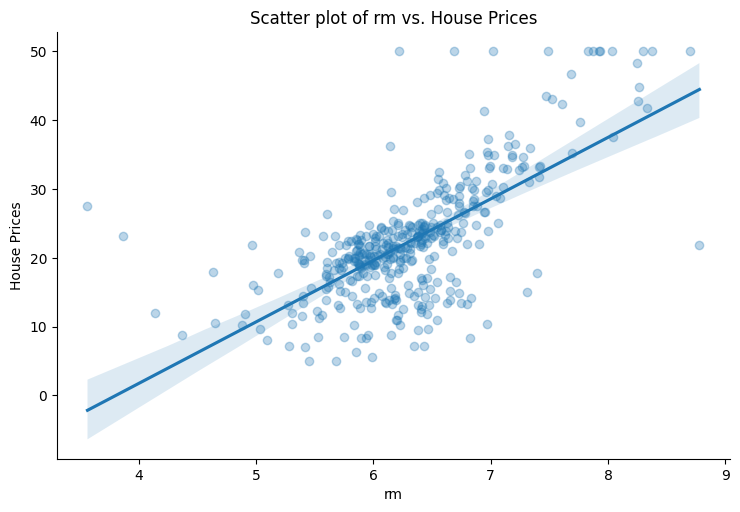

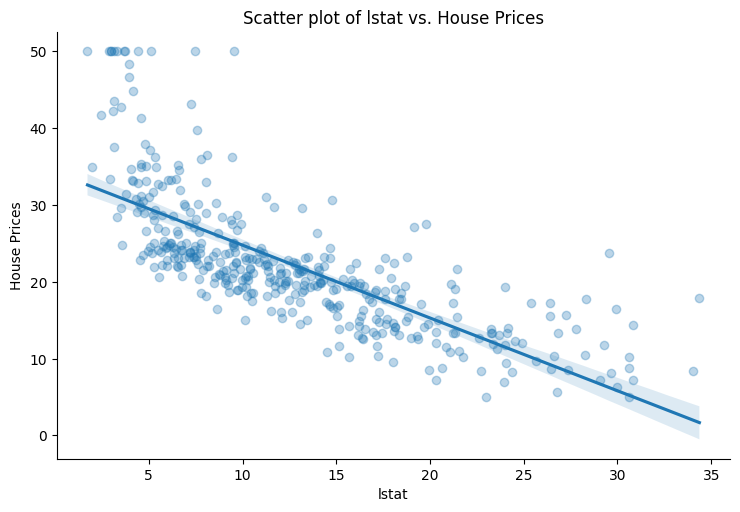

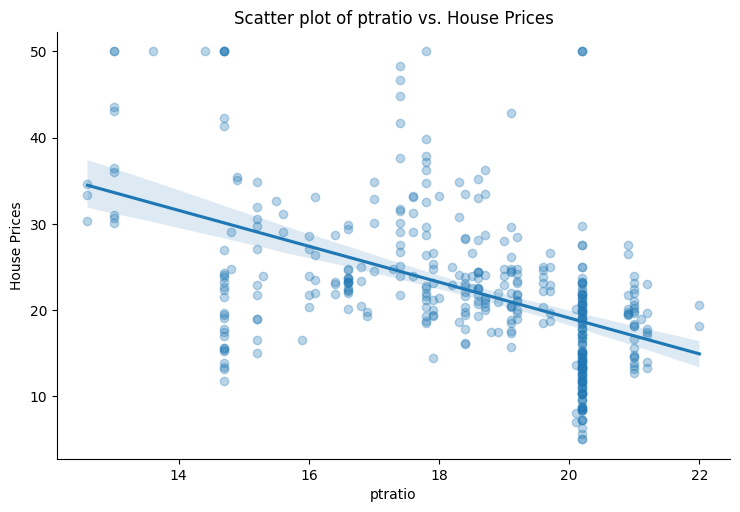

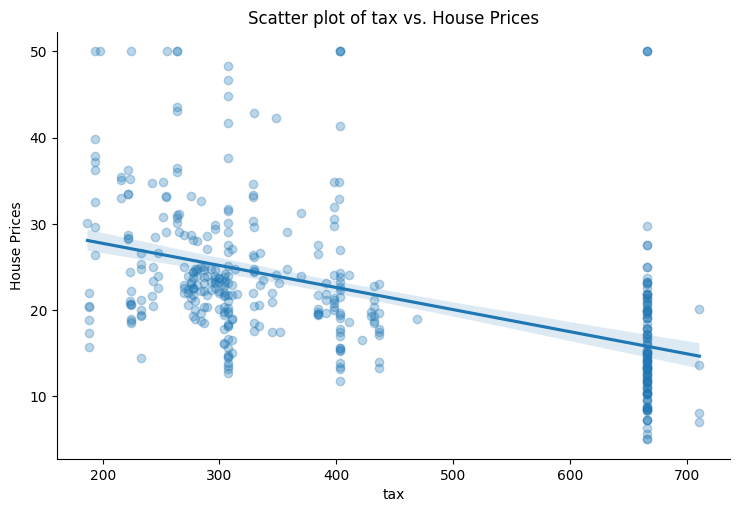

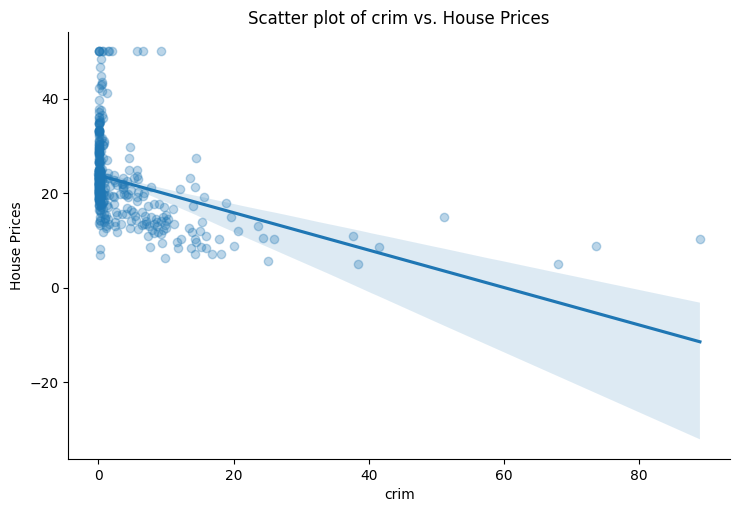

In [6]:
# Your plots here

# Selecting variables that might be correlated with house prices
selected_variables = ['rm', 'lstat', 'ptratio', 'tax', 'crim']

# Creating scatter plots with regression lines
for var in selected_variables:
    sns.lmplot(x=var, y='medv', data=house_prices, aspect=1.5, scatter_kws={'alpha':0.3})
    plt.title(f"Scatter plot of {var} vs. House Prices")
    plt.xlabel(var)
    plt.ylabel('House Prices')
    plt.show()


c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


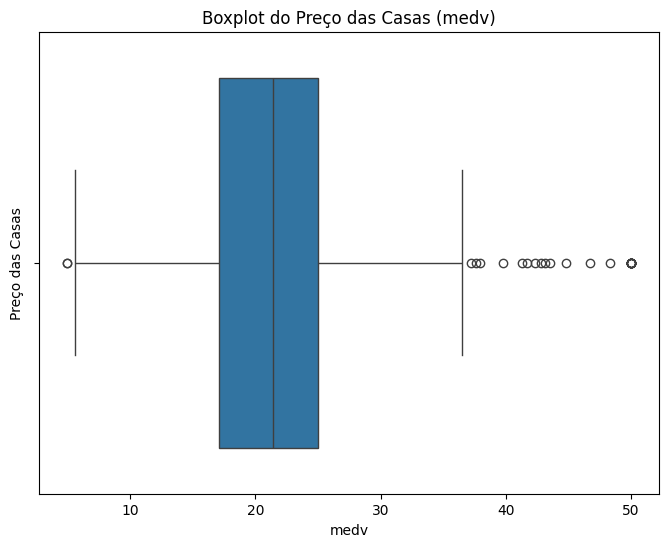

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='medv', data=house_prices, orient='v')
plt.title('Boxplot do Preço das Casas (medv)')
plt.ylabel('Preço das Casas')
plt.show()

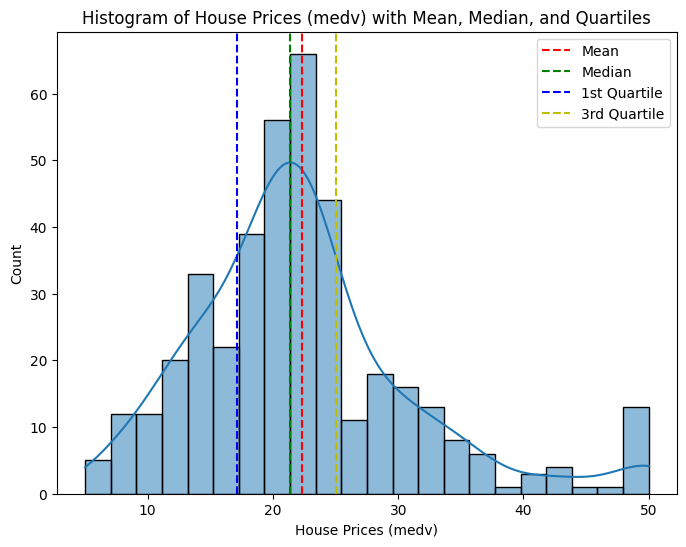

In [8]:
# Calculating descriptive statistics
mean_price = house_prices['medv'].mean()
median_price = house_prices['medv'].median()
q1_price = house_prices['medv'].quantile(0.25)
q3_price = house_prices['medv'].quantile(0.75)

# Creating the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=house_prices, x='medv', kde=True)
plt.axvline(x=mean_price, color='r', linestyle='--', label='Mean')
plt.axvline(x=median_price, color='g', linestyle='--', label='Median')
plt.axvline(x=q1_price, color='b', linestyle='--', label='1st Quartile')
plt.axvline(x=q3_price, color='y', linestyle='--', label='3rd Quartile')

# Adding legend
plt.legend()

# Adding titles and axis labels
plt.title('Histogram of House Prices (medv) with Mean, Median, and Quartiles')
plt.xlabel('House Prices (medv)')
plt.ylabel('Count')

plt.show()

In [9]:
# fig = plt.figure(figsize=(10, 7))
# fig.add_subplot(2, 1, 1)
# sns.histplot(house_prices['medv'], kde=True)
# plt.title('Distribuição dos Preços das Casas')
# plt.xlabel('Preço das Casas')
# plt.ylabel('Densidade')
# fig.add_subplot(2, 1, 2)
# sns.boxplot(house_prices['medv'])
# plt.title('Boxplot do Preço das Casas')
# plt.xlabel('Preço das Casas')
# plt.tight_layout()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

Your response here

 rm (Average Number of Rooms) vs House Prices: There is a positive correlation between the average number of rooms and the houses prices. This relationship was exprected as larger houses with more rooms often have higher prices.

 lstat (Percentage of Lower Status Population) vs. House Prices: There is a negative linear relationship between the percentage of lower status population and house prices.  As the percentage of lower status population increases, the house prices tend to decrease. 
This relationship was also expected.

crim (Crime Rate) vs. House Prices: There is a negative correlation between crime rate and house prices. Generally, as the crime rate increases, house prices tend to decrease. This was totaly expected.

 Tax (Property Tax Rate) vs. House Prices: There doesn't seem to be a clear linear relationship between property tax rate and house prices and this was not expected. I assumed that the property tax value was related to the value of the property



### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

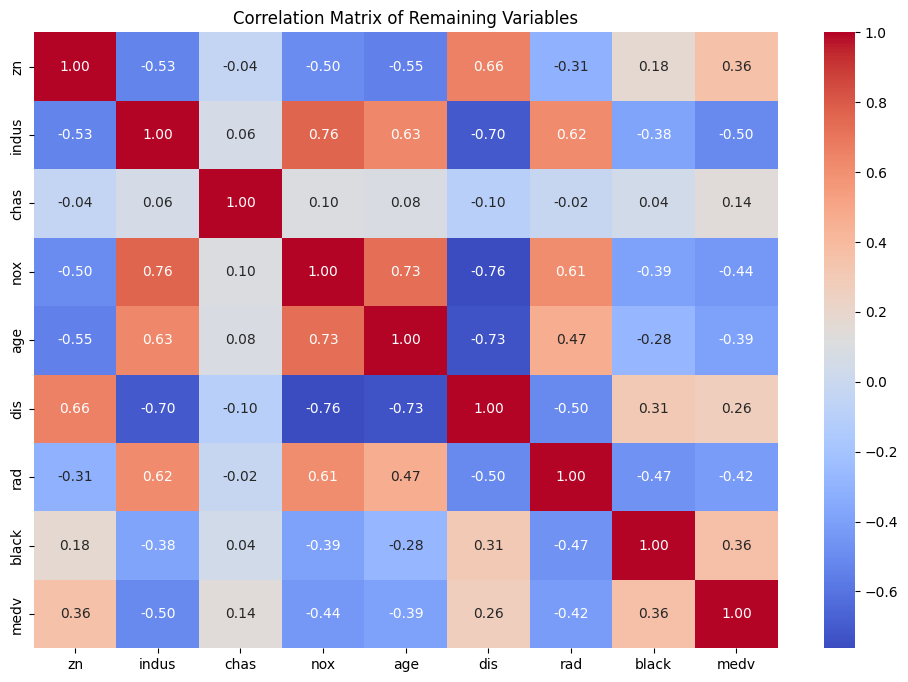

In [10]:
# Your response here
# Selecting the remaining variables
remaining_variables = house_prices.drop(columns=selected_variables)

# Calculating the correlation matrix
remaining_correlation_matrix = remaining_variables.corr()

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(remaining_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Remaining Variables')
plt.show()

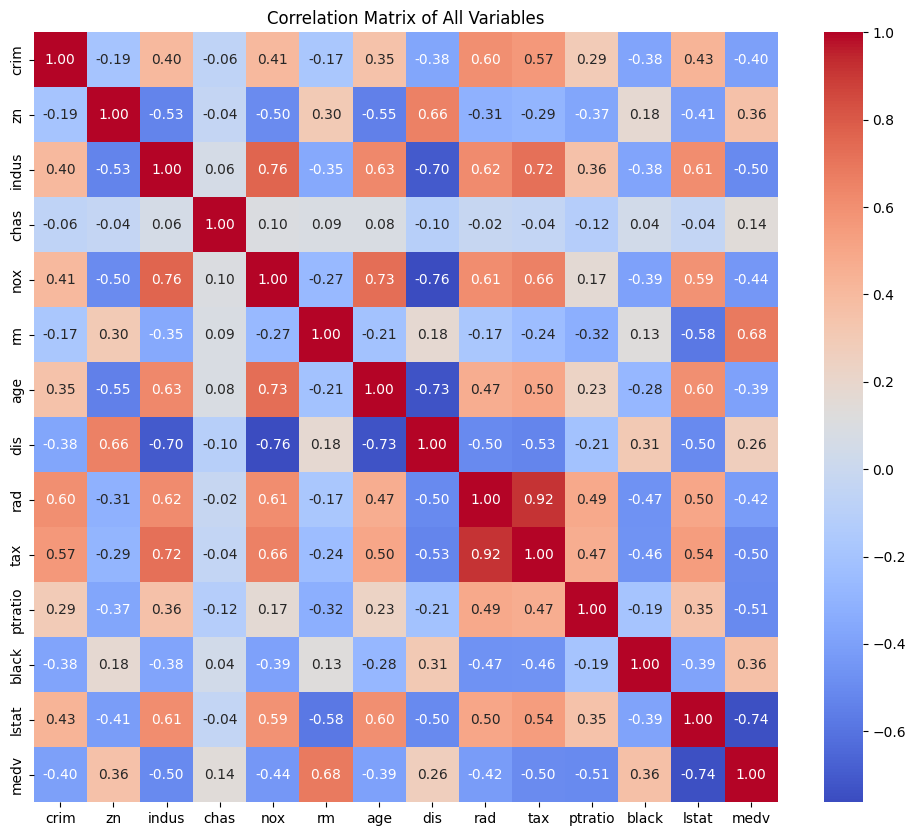

In [11]:
# Calculating the correlation matrix
full_correlation_matrix = house_prices.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(full_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of All Variables')
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [12]:
# Your code here
house_prices.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [13]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    mse = mean_squared_error(y_true, y_predict)
    return mse

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [14]:
# Your code here

features = house_prices.drop(columns=['medv'])  # All columns except 'medv'
prices = house_prices['medv'] 

# Shuffle and split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [15]:
# Five separate RFR here with the given max depths

Now, plot the score for each tree on the training set and on the testing set.

In [16]:
# Produce a plot with the score for the testing and training for the different max depths

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [17]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [18]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Define the max_depth values
max_depths = [1, 2, 4, 6, 8, 10]

# Lists to store the MSE and MAE scores
mse_scores = []
mae_scores = []

# Loop through each max_depth value
for depth in max_depths:
    # Create the RandomForestRegressor model with the specified max_depth
    rf_regressor = RandomForestRegressor(max_depth=depth, random_state=42)
    
    # Fit the model to the scaled training data
    rf_regressor.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    y_pred = rf_regressor.predict(X_test_scaled)
    
    # Calculate MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Add the results to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)

# Print the results
for depth, mse, mae in zip(max_depths, mse_scores, mae_scores):
    print(f"Max Depth: {depth}, MSE: {mse}, MAE: {mae}")

Max Depth: 1, MSE: 26.980087023048707, MAE: 3.6864319844584705
Max Depth: 2, MSE: 18.580244214129085, MAE: 3.25661512544706
Max Depth: 4, MSE: 15.557977528780917, MAE: 2.7648115990147835
Max Depth: 6, MSE: 13.74926029529552, MAE: 2.5558791542114134
Max Depth: 8, MSE: 13.079280937819124, MAE: 2.524124465691774
Max Depth: 10, MSE: 13.470499627831312, MAE: 2.5479829584480855


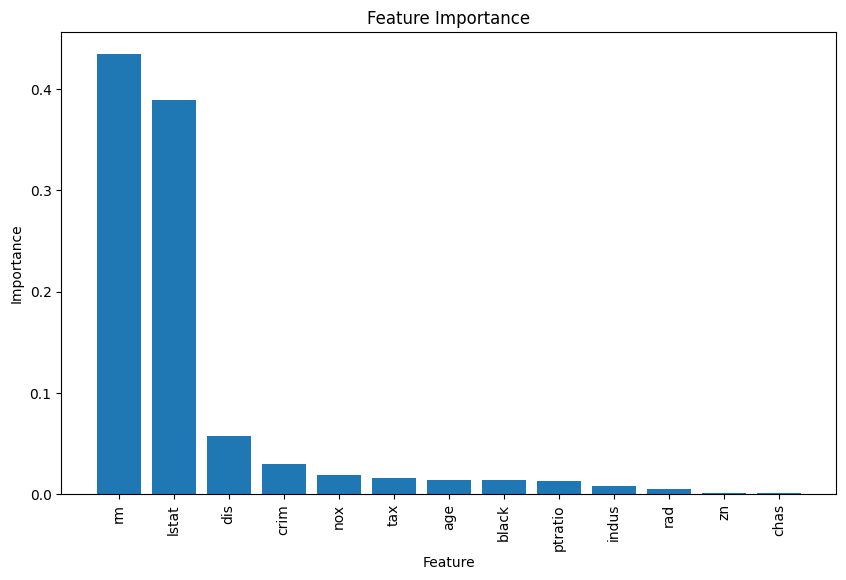

In [22]:
# Create the RandomForestRegressor model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(max_depth=8, random_state=42)
best_rf_regressor.fit(X_train_scaled, y_train)

# Get the feature importances
feature_importances = best_rf_regressor.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Feature names
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

In [24]:
best_rf_regressor = RandomForestRegressor(max_depth=8, random_state=42)
best_rf_regressor.fit(X_train_scaled, y_train)

feature_importances = best_rf_regressor.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Order by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# The most important features
print("The most important features:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Features mais importantes:
rm: 0.43447524212185706
lstat: 0.3891266401519387
dis: 0.057079134359881295
crim: 0.029323219336448266
nox: 0.019285520291008114
tax: 0.015766676454301014
age: 0.01378587486820698
black: 0.013632575647891994
ptratio: 0.013059437482391799
indus: 0.00755780610634142
rad: 0.00520601785581791
zn: 0.00104406703609309
chas: 0.0006577882878224503



When the model is trained with a maximum depth of 1, it suffers from high bias. 
he model is too simplistic to adequately represent the relationship between the input variables and the target variable. As a result, the model underestimates the complexity of the data and tends to be overly generalized, leading to consistent systematic errors both in the training and test data. This indicates high bias.
On the other hand, when the model is trained with a maximum depth of 10, it suffers from high variance. A model with a high maximum depth can become excessively complex and overfit the training data. 



### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

# Your response here

The model with a maximum depth of 10 has the lowest MSE (13.47), indicating that it has the smallest mean of the squares of the differences between predictions and actual values. This suggests that the model with a depth of 10 performs best in terms of proximity of predictions to actual values.

The model with a maximum depth of 8 has the lowest MAE (2.52), indicating that it has the smallest mean of the absolute differences between predictions and actual values. This suggests that the model with a depth of 8 performs best in terms of the magnitude of prediction errors.

Therefore, considering both metrics, the model with a maximum depth of 8 can be considered the best in this case, as it has the lowest MAE and a relatively low MSE.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

# Your response here

Using housing data from 1978 to predict home prices today may not work well because the factors influencing home prices have changed a lot over time.

For instance, the dataset lacks crucial information such as square footage, number of bathrooms, and other pertinent details that are integral to accurately describing a home

Data collected from an urban city may not be directly applicable to a rural area due to differences in property values, demographics, and other local factors.

